# Importing libraries

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import requests
import io
import re
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # only to hide deprecation warning about axes.hold

The libraries being dealt with primarily are pandas, networkx, matplotlib, and requests. We are using pandas for the purpose of data analysis and bringing the data we'll be using into Python.

# Remove me possibly... globe!

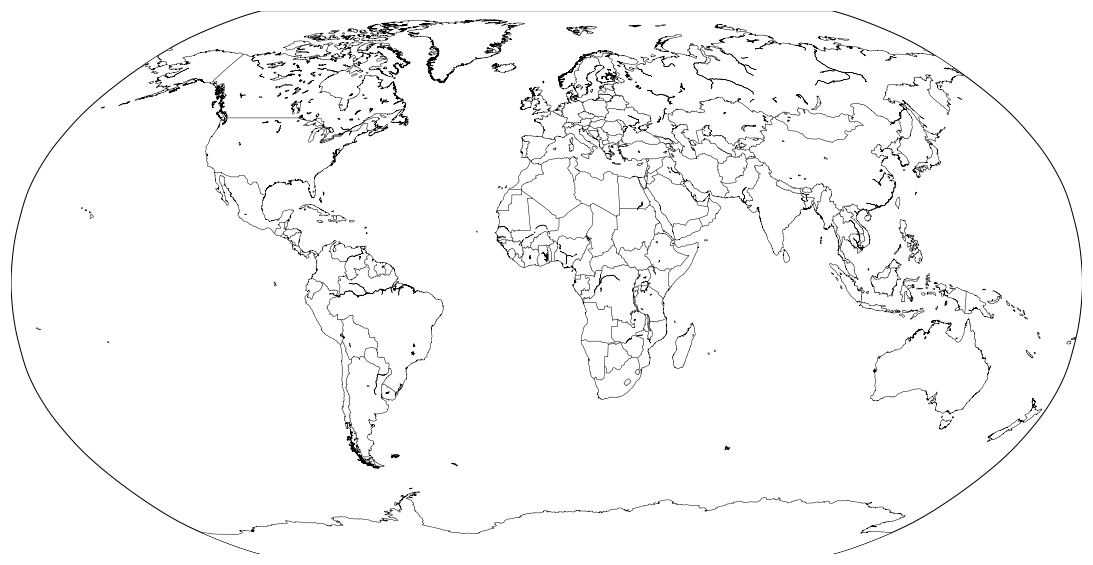

In [2]:
plt.figure(figsize=(20,10))
world_map = Basemap(projection='robin',lon_0=0,resolution='l')
world_map.drawcountries(linewidth = 0.5)
world_map.fillcontinents(color='white',lake_color='white')
world_map.drawcoastlines(linewidth=0.5)

In the above code, we have a globe that we are using for mapping the languages onto. This code actually might be removed at the suggestion of the group as it might be too far reaching. The globe's size was initially small, so it was increased using the `plt.figure()` function. From there, Basemap was used to create a Robinson projection of the globe, and the countries and coasts were all drawn with 0.5 pixel line widths; the lakes were drawn in white to essentially make them invisible.

# Setting up the data

In [13]:
data_folder = "https://github.com/gabartomeo/data620-cunysps/raw/master/Assignment 02/Data/"
languoid_url = data_folder + "languoid.csv?raw=true"
languoid_content = requests.get(languoid_url).content
languoid_csv = pd.read_csv(io.StringIO(languoid_content.decode('utf-8')))
languoid = languoid_csv[["name", "latitude", "longitude", "newick", "level"]].copy()
# print(languoid.head())
# print(languoid.describe())

The data we used came from [Kaggle](https://www.kaggle.com/rtatman/world-language-family-map). Using requests we gathered the content of the data stored on Github, and then read the entire file as a \*.CSV using the pandas library's `read_csv()` function. We sectioned out the columns we wanted - name, latitude, longitude, newick, and level - and copied it into a new variable. This list might need to be shortened depending on whether the group thinks we should try mapping it on the globe or not.

In [14]:
#temp = languoid[languoid["level"]=="family"]
#temp[temp["name"].str.startswith("La")]
#s = temp.loc[10385]["newick"]
#s
#languoid["newick"] = [row.split(",") for row in languoid["newick"]] # yuck
#languoid[:,"newick"].split(",") #nope, doesn't work, don't use me
#languoid["newick"] = languoid["newick"].map(lambda x: x.split(")")) # works also... maybe?
#languoid["newick"] = languoid["newick"].map(lambda x: [i.split(",") for i in x] if type(x) == type([]) else x.split(",")) # works!... maybe?
def strip_parentheses(newick_list):
    list_new = re.sub("\([^()\"]*(?:\"[^\"]*\"[^()\"]*)*\)", "", newick_list)
    return list_new

def remove_all_parentheses(newick_list_new):
    while True:
        try:
            list_newest = strip_parentheses(list_newest)
        except NameError:
            list_newest = strip_parentheses(newick_list_new)
        if "(" not in list_newest:
            break
    list_newest = list_newest.split(",")
    return list_newest

languoid["newick"] = languoid["newick"].map(lambda x:  x[x.index("("):x.rindex(")")] if x[0] == "(" else x)

We need to find a way to make this work better. All the languages listed in newick have the following format:

* (language list)'overarching language/family' ... the second is all we need, not the list describing that language/family group!
* 'LanguageName \[languageid\]'

An example of this is visible on the [pastebin](https://pastebin.com/Ui0HrDsy) I made for deconstructing Abuaban's string into a list-type format in Sublime Text.

In [15]:
languoid["newick"] = languoid["newick"].map(remove_all_parentheses)

KeyboardInterrupt: 

In [ ]:
#languoid.loc[2,"newick"]
#languoid.loc[9, "level"]
#languoid.loc[524, "newick"]
languoid["newick_len"] = languoid["newick"].apply(len)
languoid[]